<a id="1"></a>
# <p style="background-color:#2f6868;font-family:newtimeroman;color:#FFF9ED;font-size:170%;text-align:center;border-radius:10px 10px;">Análisis del transsporte público en España</p>

## Descripción

Este proyecto tiene como objetivo realizar un análisis de datos del conjunto "Transporte Público España". En él se explorará el conjunto de datos para analizar los factores que influyen en la eficiencia y puntualidad del sistema de transporte público en varias ciudades españolas.

El análisis se centrará en identificar patrones y tendencias en los datos relacionados con los retrasos, la duración de los viajes, la ocupación de los vehículos y las diferencias entre tipos de transporte y rutas. Se examinarán variables como el tipo de transporte (autobús, metro, tranvía, tren), las rutas específicas, las regiones, los horarios de viaje y el número de pasajeros.

Al identificar los factores que más influyen en los retrasos y en la duración de los viajes, este análisis puede ayudar a las autoridades de transporte a implementar estrategias efectivas para mejorar la puntualidad, optimizar las rutas y horarios, y en última instancia, aumentar la satisfacción de los usuarios y la eficiencia general del sistema de transporte público.

---

## Preguntas/Problema que buscamos resolver
¿Cómo puede mejorarse la eficiencia del sistema de transporte público en España, específicamente en términos de reducción de retrasos y optimización de tiempos de viaje, teniendo en cuenta las diferencias entre tipos de transporte, rutas y regiones?

---

### 1. Importar Bibliotecas

In [227]:
# %pip install missingno openpyxl


In [250]:
# Importar bibliotecas para manipulación de datos y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import openpyxl

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [229]:
# Cargar el archivo de funciones en el notebook
%run ../scripts/utils.py

<Figure size 640x480 with 0 Axes>

### 2. Importar Datos

In [230]:
# Cargar los datos 
path = f'C:/Users/delahozce/OneDrive - GLOBAL HITSS/Documentos/Proyectos/Codes/Test_adalab/EDA -Transporte_Publico_en_España/' # Ruta del directorio
df = pd.read_csv(path + 'data/Transporte_Publico_Espana.csv')

### 3. Exploración de los datos

In [231]:
# Visión General del Conjunto de Datos
print(df.shape)
print('\nMuestra de las primeras filas del conjunto de datos\n')
print(df.head(3))

print('\nMuestra de las últimas filas del conjunto de datos\n')
print(df.tail(3))

(100100, 9)

Muestra de las primeras filas del conjunto de datos

   ID_Viaje                Fecha                Ruta  Numero_Pasajeros  \
0         1  2023-01-01 00:00:00  Barcelona - Bilbao               NaN   
1         2  2023-01-01 00:01:00    Malaga - Sevilla              99.0   
2         3  2023-01-01 00:02:00   Madrid - Zaragoza              10.0   

  Duracion_Viaje_Minutos  Retraso_Minutos Tipo_Transporte     Region  \
0          not_available              999         Tranvía    Sevilla   
1                  192.0               58            Tren  Barcelona   
2                   94.0              119         Autobús     Madrid   

  Dia_Semana  
0     Sunday  
1     Sunday  
2     Sunday  

Muestra de las últimas filas del conjunto de datos

        ID_Viaje                Fecha                Ruta  Numero_Pasajeros  \
100097        98  2023-01-01 01:37:00    Malaga - Sevilla              65.0   
100098        99  2023-01-01 01:38:00  Madrid - Barcelona              41.0  

In [232]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100100 entries, 0 to 100099
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID_Viaje                100100 non-null  int64  
 1   Fecha                   100100 non-null  object 
 2   Ruta                    100100 non-null  object 
 3   Numero_Pasajeros        99099 non-null   float64
 4   Duracion_Viaje_Minutos  99767 non-null   object 
 5   Retraso_Minutos         100100 non-null  int64  
 6   Tipo_Transporte         100100 non-null  object 
 7   Region                  100100 non-null  object 
 8   Dia_Semana              100100 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 6.9+ MB


In [233]:
#Conversión de Tipos
df['Fecha'] = pd.to_datetime(df['Fecha'])

In [234]:
# Valores nulos por columna
df.isnull().sum()

ID_Viaje                     0
Fecha                        0
Ruta                         0
Numero_Pasajeros          1001
Duracion_Viaje_Minutos     333
Retraso_Minutos              0
Tipo_Transporte              0
Region                       0
Dia_Semana                   0
dtype: int64

In [235]:
# Valores únicos por columna
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")

ID_Viaje: 100000
Fecha: 100000
Ruta: 10
Numero_Pasajeros: 90
Duracion_Viaje_Minutos: 706
Retraso_Minutos: 121
Tipo_Transporte: 4
Region: 7
Dia_Semana: 7


In [236]:
# Estadísticas descriptivas
df.iloc[:,1:].describe(include='all').transpose() # Se excluye el ID del viaje

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Fecha,100100,NaN,NaN,NaN,2023-02-04 16:29:35.994005760,2023-01-01 00:00:00,2023-01-18 07:24:45,2023-02-04 16:29:30,2023-02-22 01:34:15,2023-03-11 10:39:00,NaN
Ruta,100100,10,Bilbao - Madrid,10201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Numero_Pasajeros,99099.0,NaN,NaN,NaN,54.465171,10.0,32.0,54.0,77.0,99.0,25.95646
Duracion_Viaje_Minutos,99767,706,not_available,335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Retraso_Minutos,100100.0,NaN,NaN,NaN,64.044685,0.0,29.0,59.0,90.0,999.0,74.795155
Tipo_Transporte,100100,4,Tranvía,25084,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,100100,7,Madrid,14423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dia_Semana,100100,7,Sunday,14500,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Observaciones: 
El dataset contiene 100100 registros con 9 columnas. En las columnas Numero_Pasajeros y Duracion_Viaje_Minutos existen valores nulos. La columna Duracion_Viaje_Minutos contiene valores no numéricos y numéricos.*

In [237]:
# Revisión de duplicados
print(df.duplicated().sum())

100


In [238]:
# Identificar duplicados considerando todas las columnas
duplicated_rows_all = df[df.duplicated(keep=False)]

print("\nTodas las filas duplicadas (incluyendo todas las columnas):")
duplicated_rows_all.sort_values('Numero_Pasajeros').head(4)


Todas las filas duplicadas (incluyendo todas las columnas):


,ID_Viaje,Fecha,Ruta,Numero_Pasajeros,Duracion_Viaje_Minutos,Retraso_Minutos,Tipo_Transporte,Region,Dia_Semana
2,3,2023-01-01 00:02:00,Madrid - Zaragoza,10.0,94.0,119,Autobús,Madrid,Sunday
83,84,2023-01-01 01:23:00,Bilbao - Madrid,10.0,639.0,9,Autobús,Valencia,Sunday
100002,3,2023-01-01 00:02:00,Madrid - Zaragoza,10.0,94.0,119,Autobús,Madrid,Sunday
100083,84,2023-01-01 01:23:00,Bilbao - Madrid,10.0,639.0,9,Autobús,Valencia,Sunday


In [239]:
# Eliminar los duplicados
df.drop_duplicates(inplace=True) 
df.shape

(100000, 9)

*Después e evidenciar que en la columna Duracion_Viaje_Minutos existia un dato string ('not_available') se hace el tratamiento para excluirlo 
y dejar la celda vacia y poder convertir la columna en tipo numérico*

In [240]:
# Manejo de 'not_available' y convertir al tipo numérico
df = df.replace('not_available', np.nan)
df['Duracion_Viaje_Minutos'] = pd.to_numeric(df['Duracion_Viaje_Minutos'], errors='coerce')

Ruta
Bilbao - Madrid         10191
Madrid - Malaga         10139
Zaragoza - Barcelona    10053
Barcelona - Bilbao      10036
Sevilla - Madrid        10000
Madrid - Zaragoza        9960
Malaga - Sevilla         9938
Barcelona - Valencia     9925
Madrid - Barcelona       9922
Valencia - Sevilla       9836
Name: count, dtype: int64


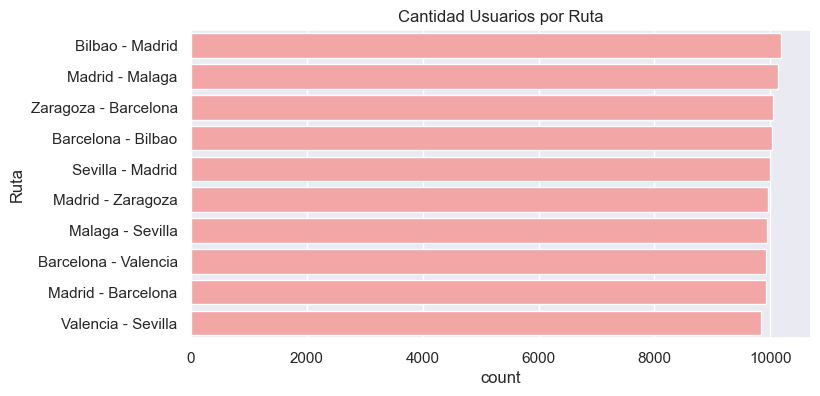

Tipo_Transporte
Tranvía    25059
Autobús    25050
Tren       24954
Metro      24937
Name: count, dtype: int64


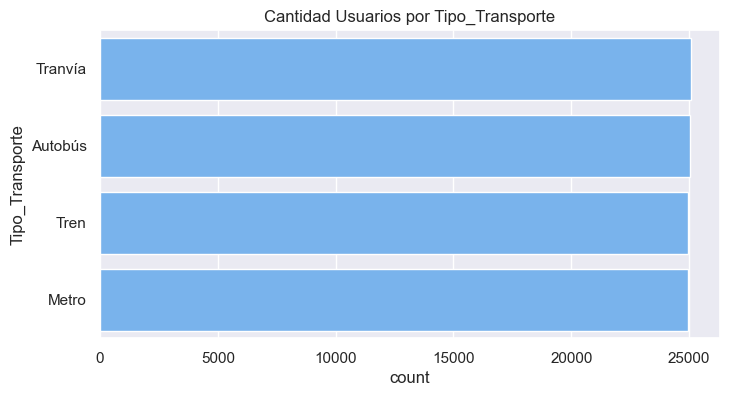

Region
Madrid       14405
Bilbao       14376
Valencia     14310
Zaragoza     14268
Barcelona    14259
Malaga       14203
Sevilla      14179
Name: count, dtype: int64


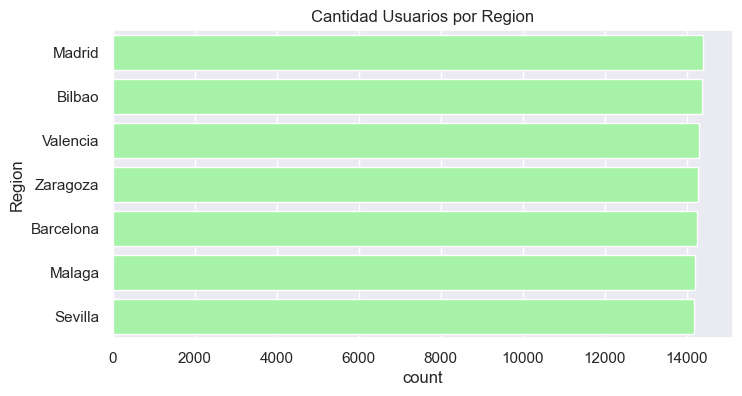

Dia_Semana
Sunday       14400
Monday       14400
Tuesday      14400
Wednesday    14400
Thursday     14400
Friday       14400
Saturday     13600
Name: count, dtype: int64


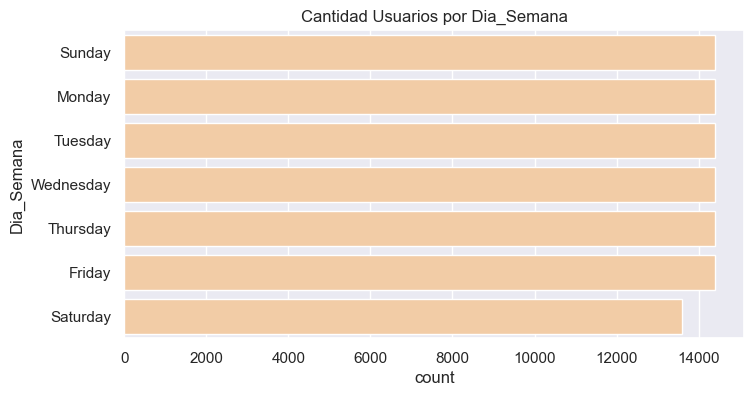

In [311]:
# Análisis de Variables Categóricas:
sns.set(style="darkgrid")
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#f0e6c2']

for i, col in enumerate(df.select_dtypes(include=['object']).columns):
    print(df[col].value_counts())

    plt.figure(figsize=(8, 4))  
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette=[colors[i % len(colors)]])
    plt.title(f'Cantidad Usuarios por {col}')
    plt.savefig(path +'/reports/'+ f'Cantidad_Usuarios_por_ {col}' +'.png')
    plt.show()

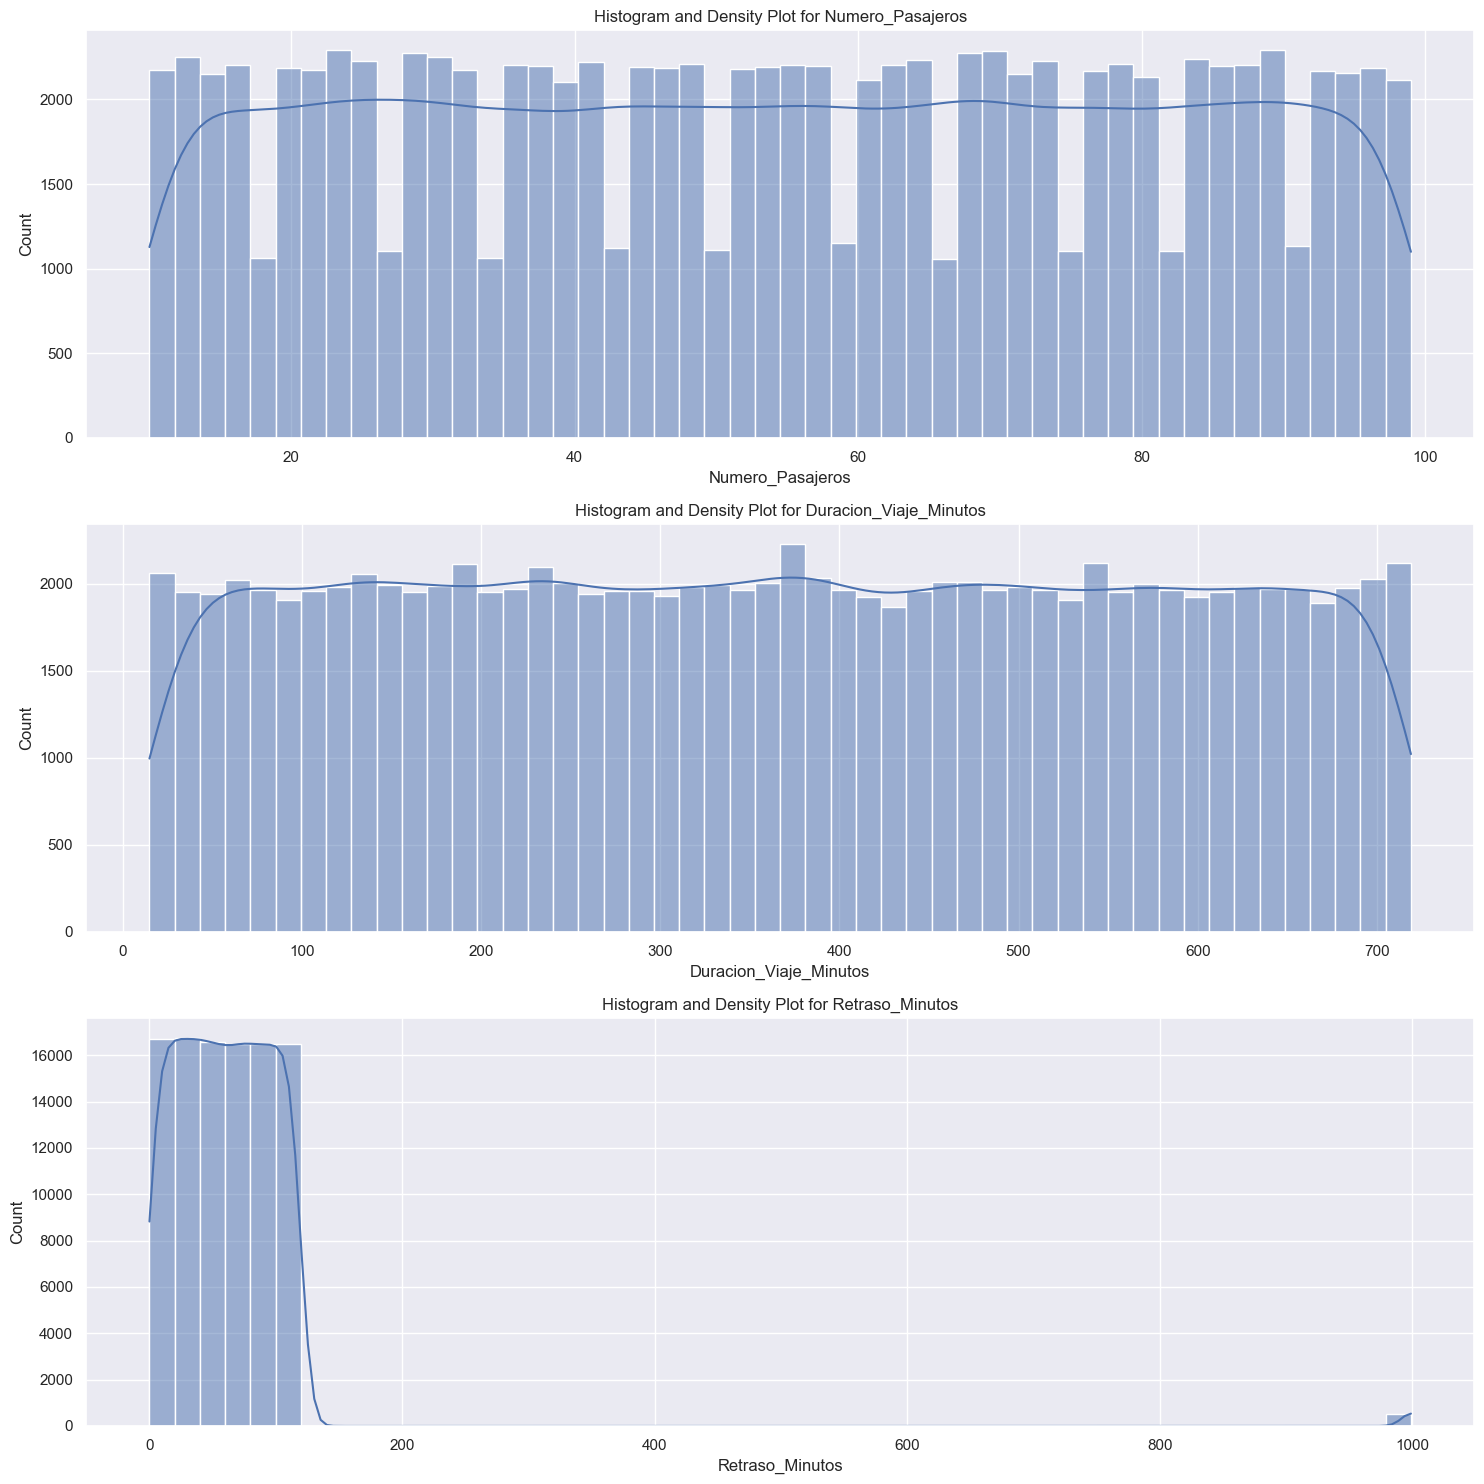

In [312]:
# Análisis de variables numéricas
numeric_columns = ['Numero_Pasajeros', 'Duracion_Viaje_Minutos', 'Retraso_Minutos']

fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(15, 15))

for i, (ax, col) in enumerate(zip(axes, numeric_columns)):
    sns.histplot(df[col], bins=50, kde=True, ax=ax)
    ax.set_title(f'Histogram and Density Plot for {col}')

plt.savefig(path +'/reports/histogramas.png')
plt.tight_layout()
plt.show()


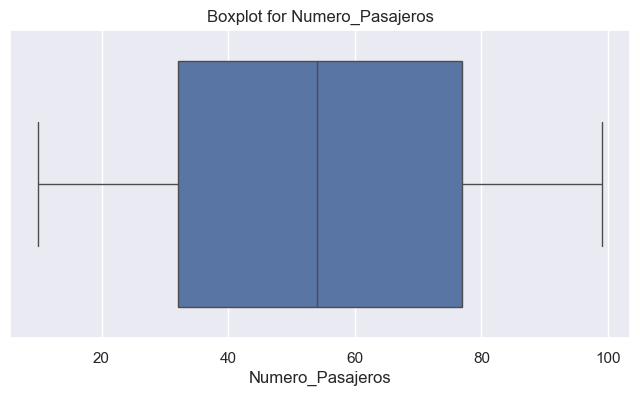

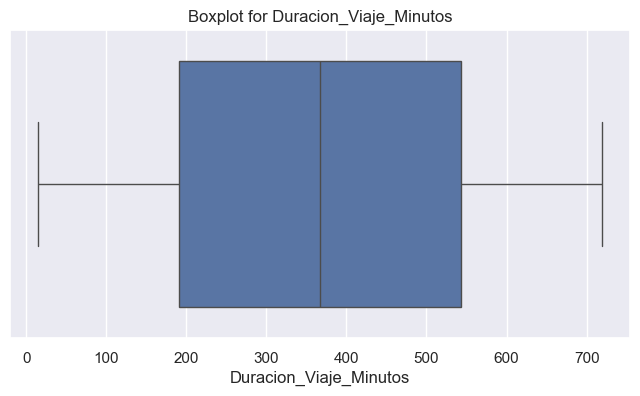

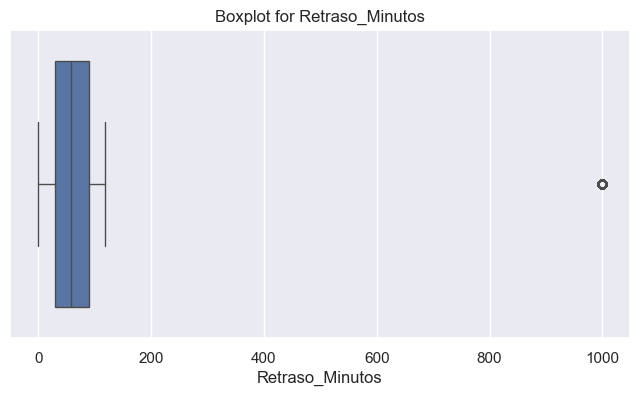

In [313]:
# Boxplots
for i, col in enumerate(numeric_columns):
    plt.figure(figsize=(8, 4)) 
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.savefig(path +'/reports/'+ f'Boxplot_ {col}' +'.png')
    plt.show()

### 4. Imputación e identifiación de outlier
*Con la evidencia que existen datos nulos se buscarará imputar dichos con el metodo de MICE, el cual consiste en en la imputación múltiple consiste en generar múltiples conjuntos de datos imputados para reflejar la incertidumbre inherente en la imputación de valores faltantes. Luego, los análisis se realizan en cada uno de estos conjuntos de datos imputados y los resultados se combinan para obtener estimaciones finales.*

In [247]:
# Imputación MICE (Multivariate Imputation by Chained Equations)
null_columns = ['Numero_Pasajeros', 'Duracion_Viaje_Minutos']

df_mice = df.copy()
mice_imputer = IterativeImputer(random_state=0, estimator=RandomForestRegressor())
df_mice[null_columns] = mice_imputer.fit_transform(df_mice[null_columns])

In [248]:
# Validación de valores nulos por columna después de la imputación
df_mice.isnull().sum()

ID_Viaje                  0
Fecha                     0
Ruta                      0
Numero_Pasajeros          0
Duracion_Viaje_Minutos    0
Retraso_Minutos           0
Tipo_Transporte           0
Region                    0
Dia_Semana                0
dtype: int64

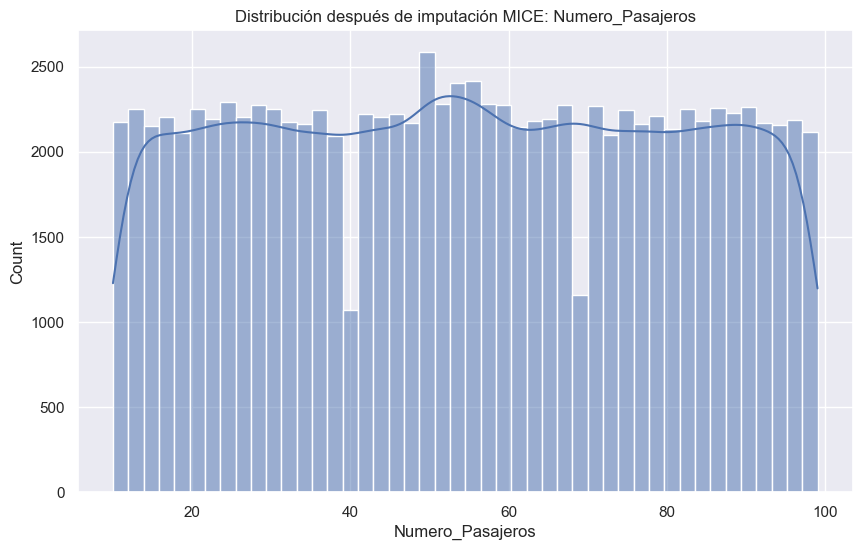

<Figure size 640x480 with 0 Axes>

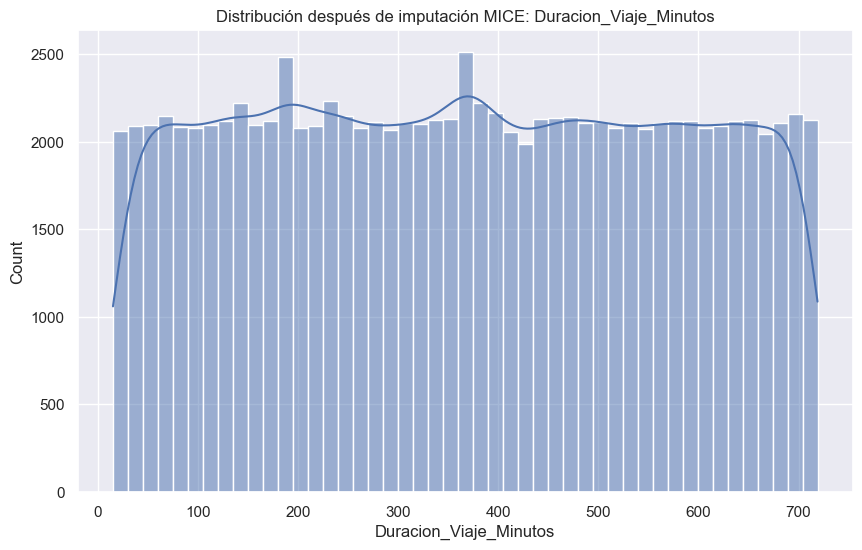

<Figure size 640x480 with 0 Axes>

In [314]:
# Visualizar distribuciones después de la imputación para validar sino cambio la distribución
for col in null_columns:
    plot_distribution(df_mice, col, f"Distribución después de imputación MICE: {col}")
    plt.savefig(path +'/reports/'+ f'Distribucion_MICE_ {col}' +'.png')

In [259]:
# # Verificar valores atípicos 

numeric_columns = ['Numero_Pasajeros', 'Duracion_Viaje_Minutos', 'Retraso_Minutos']

print("Valores atípicos por columna:")
for column in numeric_columns:
    outliers = identify_outliers(df_mice, column)
    print(f"\n{column}:")
    if outliers.empty:
        print("No se encontraron valores atípicos.")
    else:
        print(outliers.unique())

Valores atípicos por columna:

Numero_Pasajeros:
No se encontraron valores atípicos.

Duracion_Viaje_Minutos:
No se encontraron valores atípicos.

Retraso_Minutos:
[999]


*Como se evidencias outlier en la columna Retraso_Minutos, se aplicara la técnicas de winzorización la cual implica reemplazar los valores extremos de los datos (tanto los más altos como los más bajos) con los valores de los percentiles de 0.05 y 0.995 para evitar perdida de información.*

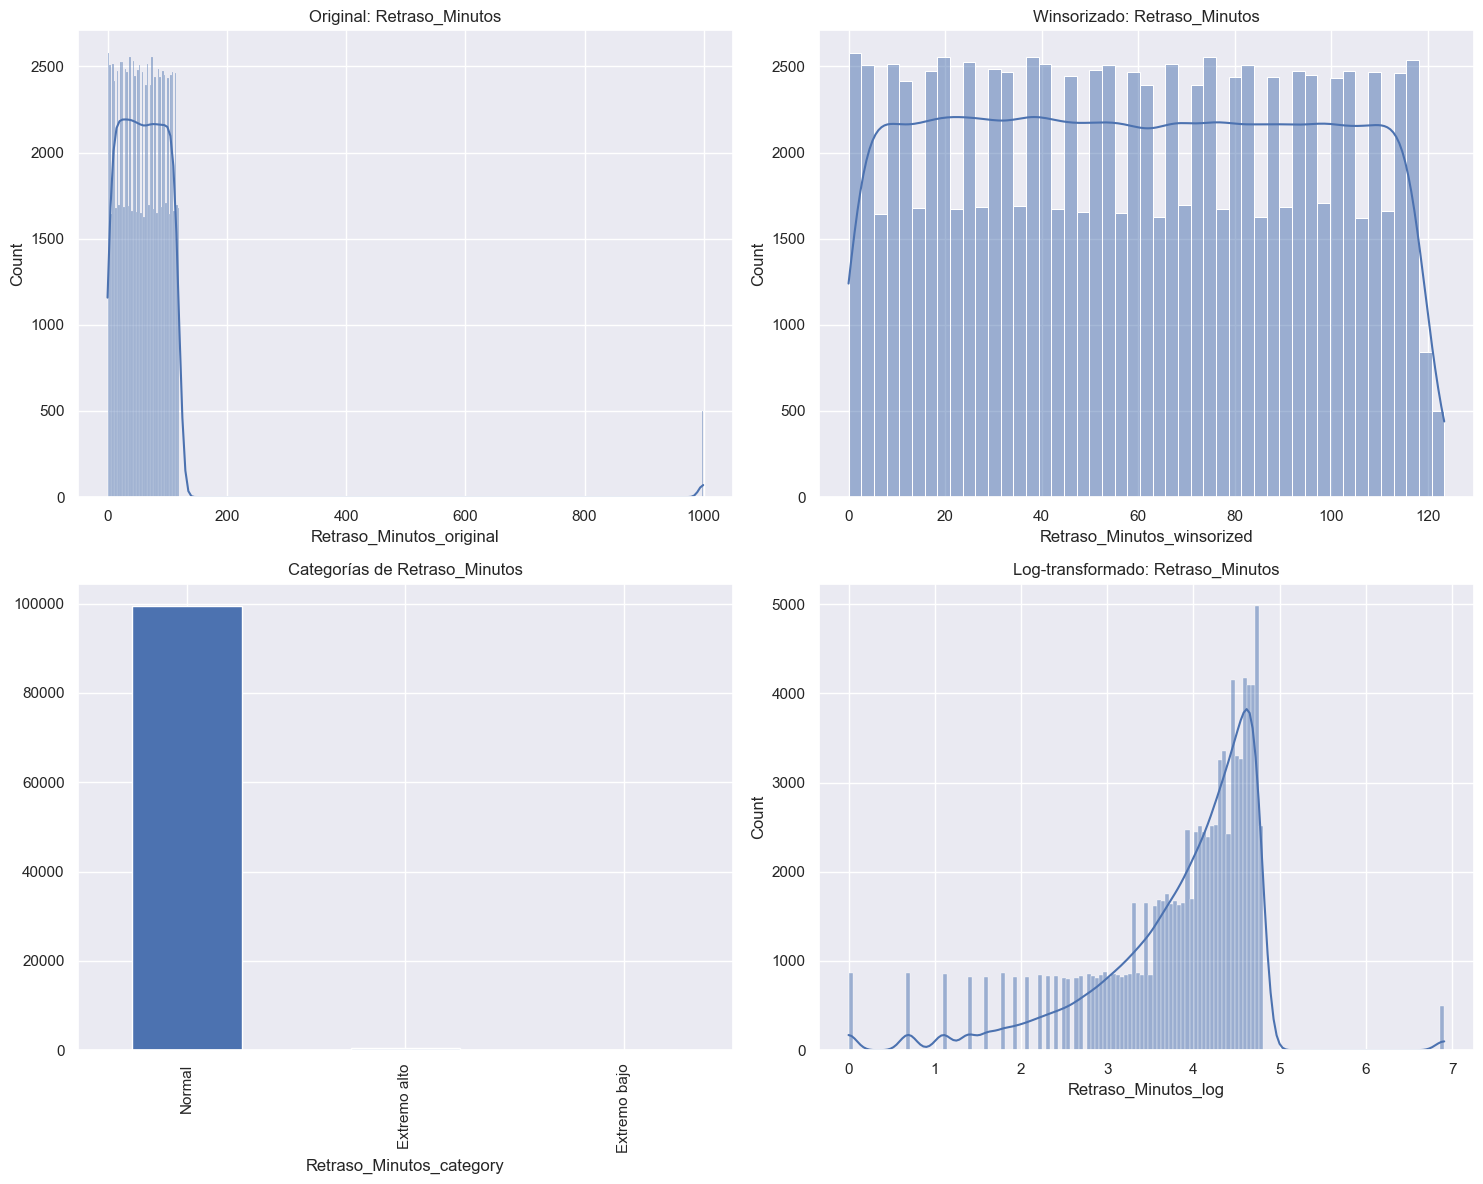

<Figure size 640x480 with 0 Axes>

In [315]:
# Aplicar técnicas a las columnas numéricas relevantes
numeric_columns = [ 'Retraso_Minutos']

for column in numeric_columns:
    df_mice[f'{column}_original'] = df_mice[column]
    df_mice[f'{column}_winsorized'] = winsorize(df_mice[column], (0.005, 0.005)) # Winsorización suave
    df_mice[f'{column}_category'] = categorize_outliers(df_mice[column]) # Categorización
    df_mice[f'{column}_log'] = np.log1p(df_mice[column]) # Transformación logarítmica (añadimos 1 para manejar valores 0)

for column in numeric_columns:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    sns.histplot(df_mice[f'{column}_original'], kde=True, ax=axes[0, 0])
    axes[0, 0].set_title(f'Original: {column}')
    
    sns.histplot(df_mice[f'{column}_winsorized'], kde=True, ax=axes[0, 1])
    axes[0, 1].set_title(f'Winsorizado: {column}')
    
    df_mice[f'{column}_category'].value_counts().plot(kind='bar', ax=axes[1, 0])
    axes[1, 0].set_title(f'Categorías de {column}')
    
    sns.histplot(df_mice[f'{column}_log'], kde=True, ax=axes[1, 1])
    axes[1, 1].set_title(f'Log-transformado: {column}')
    
    plt.tight_layout()
    plt.show()
    
plt.savefig(path +'/reports/Winsorizado.png')


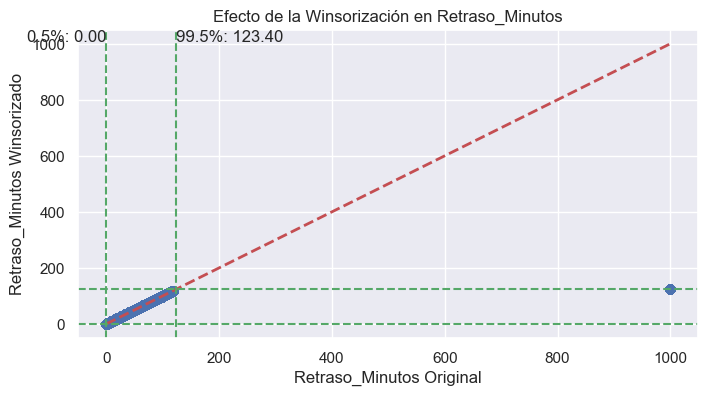

Estadísticas descriptivas originales:
count    100000.00000
mean         64.04027
std          74.76642
min           0.00000
25%          29.00000
50%          59.00000
75%          90.00000
max         999.00000
Name: Retraso_Minutos, dtype: float64

Estadísticas descriptivas winsorizadas:
count    100000.00000
mean         59.66227
std          34.89522
min           0.00000
25%          29.00000
50%          59.00000
75%          90.00000
max         123.40000
Name: Retraso_Minutos_winsorized, dtype: float64

Porcentaje de valores modificados: 0.50%


In [316]:
# Visualización del efecto de la winzorización
column = 'Retraso_Minutos'


plt.figure(figsize=(8, 4))
plt.scatter(df_mice[column], df_mice[f'{column}_winsorized'], alpha=0.5)
plt.plot([df_mice[column].min(), df_mice[column].max()], 
         [df_mice[column].min(), df_mice[column].max()], 
         'r--', lw=2)

plt.xlabel('Retraso_Minutos Original')
plt.ylabel('Retraso_Minutos Winsorizado')
plt.title('Efecto de la Winsorización en Retraso_Minutos')

# Añadir líneas para los límites de Winsorización
lower_limit = df_mice[column].quantile(0.005)
upper_limit = df_mice[column].quantile(0.995)

plt.axvline(x=lower_limit, color='g', linestyle='--')
plt.axvline(x=upper_limit, color='g', linestyle='--')
plt.axhline(y=lower_limit, color='g', linestyle='--')
plt.axhline(y=upper_limit, color='g', linestyle='--')

plt.text(lower_limit, plt.ylim()[1], f'0.5%: {lower_limit:.2f}', 
         horizontalalignment='right', verticalalignment='top')
plt.text(upper_limit, plt.ylim()[1], f'99.5%: {upper_limit:.2f}', 
         horizontalalignment='left', verticalalignment='top')

plt.savefig(path +'/reports/efecto_winsorizado.png')
plt.show()

# Estadísticas descriptivas
print("Estadísticas descriptivas originales:")
print(df_mice[column].describe())
print("\nEstadísticas descriptivas winsorizadas:")
print(df_mice[f'{column}_winsorized'].describe())

# Porcentaje de valores modificados
modified = (df_mice[column] != df_mice[f'{column}_winsorized']).sum()
percent_modified = (modified / len(df_mice)) * 100

print(f"\nPorcentaje de valores modificados: {percent_modified:.2f}%")

In [307]:
# Guardar base transformada
df_mice['Date'] = df_mice['Fecha'].dt.date
df_mice['Time'] = df_mice['Fecha'].dt.time
df1 = df_mice[['ID_Viaje','Fecha','Date','Time','Ruta','Numero_Pasajeros','Duracion_Viaje_Minutos','Retraso_Minutos_winsorized','Tipo_Transporte','Region','Dia_Semana']]
df1.to_excel(path + 'data/Transporte_Publico_Espana_transformado.xlsx', index=False)

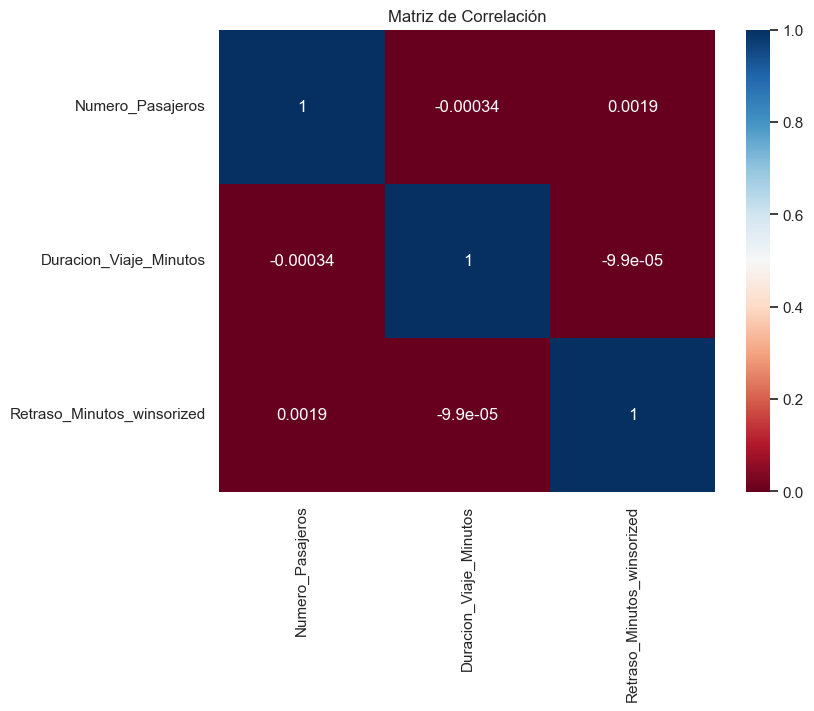

In [317]:
# Correlación entre variables numéricas
numeric_columns = ['Numero_Pasajeros', 'Duracion_Viaje_Minutos', 'Retraso_Minutos_winsorized']

plt.figure(figsize=(8, 6))
sns.heatmap(df_mice[numeric_columns].corr(), annot=True, cmap='RdBu')
plt.title('Matriz de Correlación')
plt.savefig(path +'/reports/Matriz de correlacion.png')
plt.show()

*La matriz de correlación sugiere que el número de Pasajeros, suración del Viaje en Minutos y retraso en Minutos son prácticamente independientes entre sí, esto podría podría indicar que la variables de ruta, tipo de transpórte tienen mayor influencia en estas variables.*

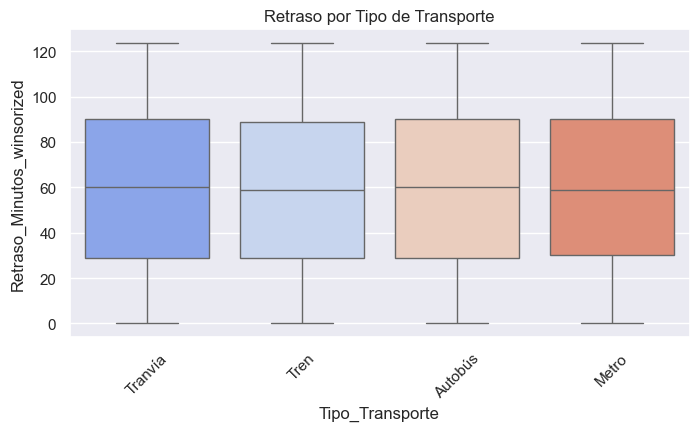

In [318]:
# Análisis por tipo de transporte
plt.figure(figsize=(8, 4))
sns.boxplot(x='Tipo_Transporte', y='Retraso_Minutos_winsorized', data=df_mice,palette="coolwarm")
plt.title('Retraso por Tipo de Transporte')
plt.xticks(rotation=45)
plt.savefig(path +'/reports/Boxplot_tipo transporte.png')
plt.show()

*Observando las gráficas se ve que aunque hay diferencias, los patrones de retraso son similares entre los diferentes tipos de transporte.
Todos los modos de transporte experimentan ocasionalmente retrasos significativos de hasta 2 horas.*

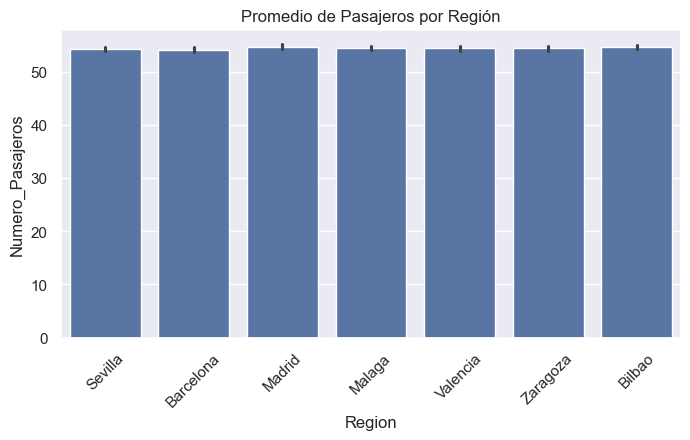

In [319]:
# Análisis por región
plt.figure(figsize=(8, 4))
sns.barplot(x='Region', y='Numero_Pasajeros', data=df_mice, estimator=np.mean)
plt.title('Promedio de Pasajeros por Región')
plt.xticks(rotation=45)
plt.savefig(path +'/reports/Pasajeros por region.png')
plt.show()

*El promedio de pasajeros para las diferentes regiones es similiar*

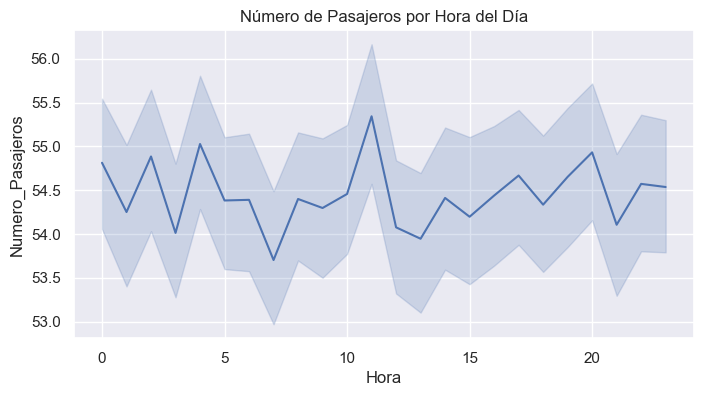

In [320]:
# Análisis temporal
df_mice['Hora'] = df_mice['Fecha'].dt.hour
plt.figure(figsize=(8, 4))
sns.lineplot(x='Hora', y='Numero_Pasajeros', data=df_mice)
plt.title('Número de Pasajeros por Hora del Día')
plt.savefig(path +'/reports/Pasajeros por hora.png')
plt.show()

*Este gráfico muestra un patrón de uso del transporte que varía a lo largo del día, con un pico significativo a media mañana (10:00am) y fluctuaciones menores durante el resto del día. La demanda se mantiene relativamente constante, lo que sugiere un sistema de transporte bien utilizado en todas las horas del día.*

Ruta
Bilbao - Madrid         10191
Madrid - Malaga         10139
Zaragoza - Barcelona    10053
Barcelona - Bilbao      10036
Sevilla - Madrid        10000
Madrid - Zaragoza        9960
Malaga - Sevilla         9938
Barcelona - Valencia     9925
Madrid - Barcelona       9922
Valencia - Sevilla       9836
Name: count, dtype: int64


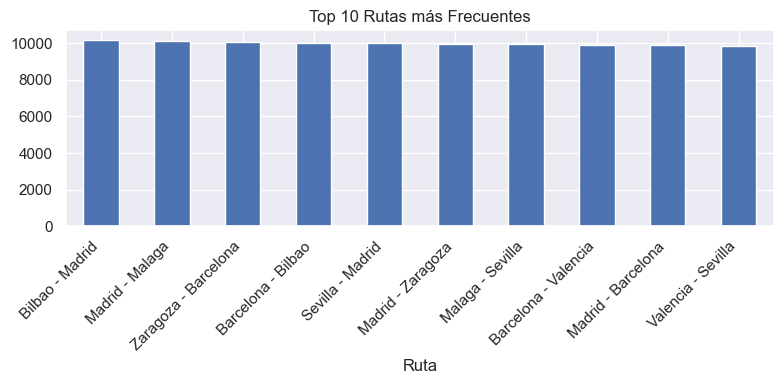

In [321]:
# Análisis de rutas más frecuentes
top_routes = df_mice['Ruta'].value_counts().head(10)
print(top_routes)
plt.figure(figsize=(8, 4))
top_routes.plot(kind='bar')
plt.title('Top 10 Rutas más Frecuentes')
plt.xticks(rotation=45, ha='right')
plt.savefig(path +'/reports/Rutas más frecuentes.png')
plt.tight_layout()
plt.show()

*Las conexiones de transporte entre las principales ciudades españolas son muy frecuentes y bastante equilibradas en términos de demanda. Madrid se destaca como punto central y estratégico, actuando como un punto de conexión principal que enlaza múltiples ciudades y regiones*

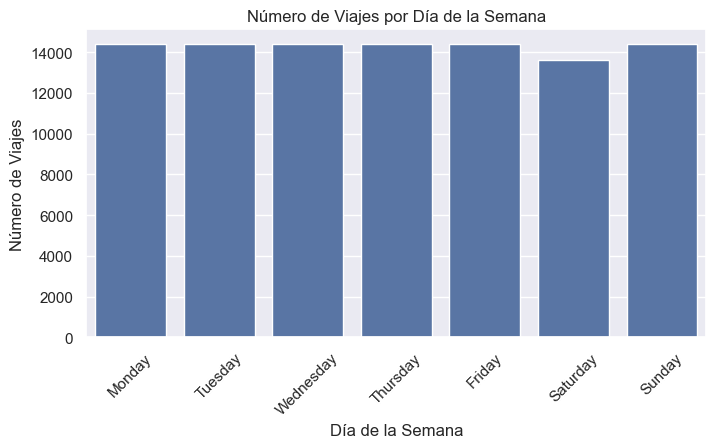

In [322]:
# Ordenar días de la semana
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_mice['Dia_Semana'] = pd.Categorical(df_mice['Dia_Semana'], categories=orden_dias, ordered=True)

plt.figure(figsize=(8, 4))
sns.countplot(x='Dia_Semana', data=df_mice, order=orden_dias)
plt.title('Número de Viajes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=45)
plt.savefig(path +'/reports/numero de viajes por dia de la semana.png')
plt.show()

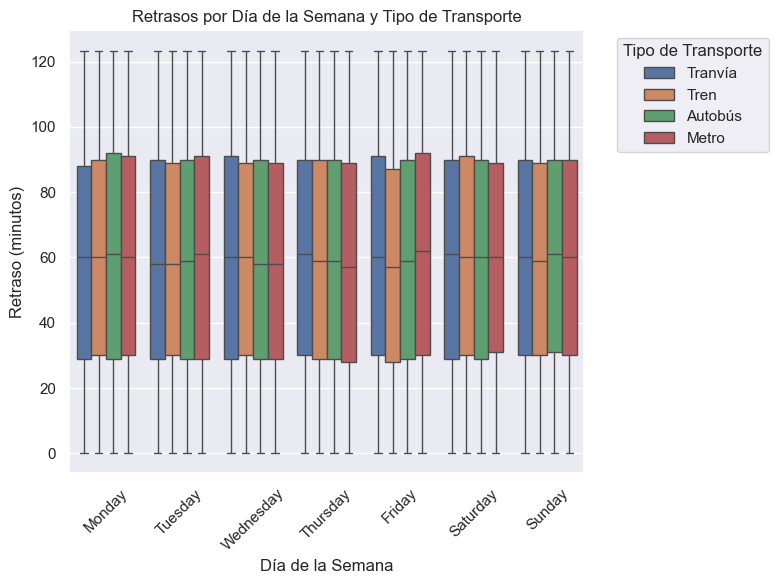

In [323]:
# Interacción entre día de la semana y tipo de transporte
plt.figure(figsize=(8, 6))
sns.boxplot(x='Dia_Semana', y='Retraso_Minutos_winsorized', hue='Tipo_Transporte', data=df_mice, order=orden_dias)
plt.title('Retrasos por Día de la Semana y Tipo de Transporte')
plt.xlabel('Día de la Semana')
plt.ylabel('Retraso (minutos)')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Transporte', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig(path +'/reports/retraso por dia de semana y tipo de transpórte.png')
plt.tight_layout()
plt.show()

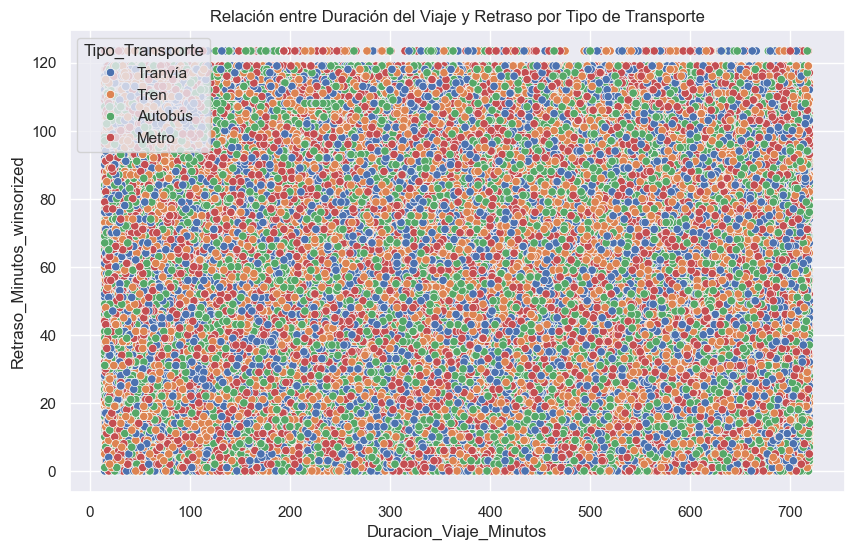

In [324]:
# Relación entre duración del viaje y retraso
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duracion_Viaje_Minutos', y='Retraso_Minutos_winsorized', 
                hue='Tipo_Transporte', data=df_mice)
plt.title('Relación entre Duración del Viaje y Retraso por Tipo de Transporte')
plt.savefig(path +'/reports/distribucion duracion del viaje y retraso por tipo de transporte.png')
plt.show()

*Se observa que no hay una relación fuerte entre la duración del viaje y el retraso en ninguno de los tipos de transporte analizados. Los retrasos parecen ocurrir de manera bastante aleatoria respecto a la duración del viaje, y todos los modos de transporte muestran patrones similares. Esto sugiere que los factores que causan retrasos podrían ser otros factores que de la duración planificada del viaje.*

In [275]:
# Resumen de Hallazgos
print("\n5. Resumen de Hallazgos")
print(f"Número total de viajes: {len(df_mice)}")
print(f"Período de tiempo cubierto: de {df_mice['Fecha'].min()} a {df_mice['Fecha'].max()}")
print(f"Tipos de transporte: {', '.join(df_mice['Tipo_Transporte'].unique())}")
print(f"Regiones cubiertas: {', '.join(df_mice['Region'].unique())}")
print(f"\nPromedio de retraso por tipo de transporte:")
print(df_mice.groupby('Tipo_Transporte')['Retraso_Minutos_winsorized'].mean().sort_values(ascending=False))
print(f"\nRuta con mayor número promedio de pasajeros:")
print(df_mice.groupby('Ruta')['Numero_Pasajeros'].mean().sort_values(ascending=False).head(1))



5. Resumen de Hallazgos
Número total de viajes: 100000
Período de tiempo cubierto: de 2023-01-01 00:00:00 a 2023-03-11 10:39:00
Tipos de transporte: Tranvía, Tren, Autobús, Metro
Regiones cubiertas: Sevilla, Barcelona, Madrid, Malaga, Valencia, Zaragoza, Bilbao

Promedio de retraso por tipo de transporte:
Tipo_Transporte
Tranvía    59.793024
Metro      59.731130
Autobús    59.718212
Tren       59.405995
Name: Retraso_Minutos_winsorized, dtype: float64

Ruta con mayor número promedio de pasajeros:
Ruta
Barcelona - Valencia    55.004575
Name: Numero_Pasajeros, dtype: float64


In [276]:
# Prueba estadística: ANOVA para diferencias en retrasos entre tipos de transporte

f_statistic, p_value = stats.f_oneway(*[group['Retraso_Minutos_winsorized'].values for name, group in df_mice.groupby('Tipo_Transporte')])
print(f"\nANOVA para diferencias en retrasos entre tipos de transporte:")
print(f"F-statistic: {f_statistic}, p-value: {p_value}")


ANOVA para diferencias en retrasos entre tipos de transporte:
F-statistic: 0.6197431279072624, p-value: 0.6021332572465492


*El análisis ANOVA confirma estadísticamente que no hay diferencias significativas en los retrasos entre los diferentes tipos de transporte analizados. Esto sugiere que los factores que causan retrasos afectan de manera similar a todos los modos de transporte, y que las estrategias para mejorar la puntualidad deberían ser generales y no específicas para cada tipo de transporte.*